Epoch 1/50


c:\Users\Fernando\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.0809 - val_loss: 0.0061
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0728 - val_loss: 0.0152
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.0437 - val_loss: 0.0273
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0265 - val_loss: 0.0385
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0213 - val_loss: 0.0430
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0126 - val_loss: 0.0406
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0164 - val_loss: 0.0321
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0148 - val_loss: 0.0213
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0116 - val_loss: 0.0115
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0078 - val_loss: 0.0053
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0087 - val_loss: 0.0035
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0037 - val_loss: 0.0054
Epoch 13/50
1/

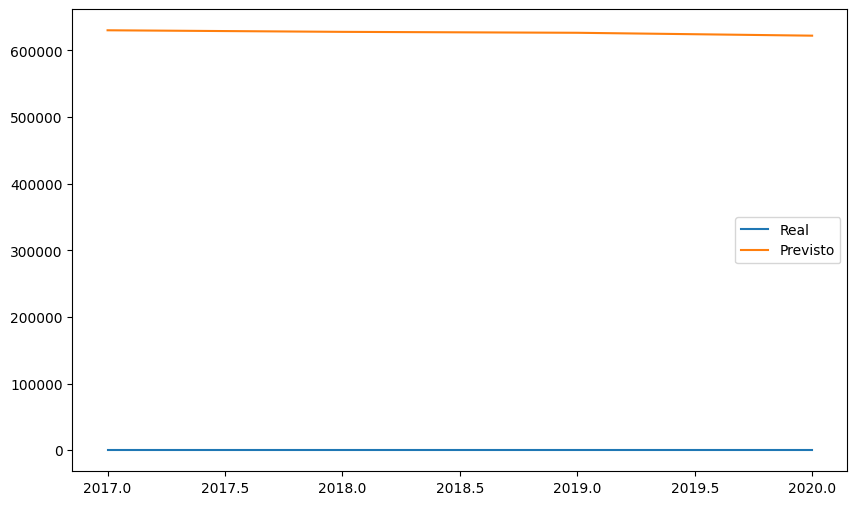

In [2]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error
from tensorflow.keras.callbacks import EarlyStopping

# Passo 1: Carregar os dados
df = pd.read_csv('base_unificada_com_casos.csv')

# Passo 2: Agrupar por país
paises = df['Local'].unique()

# Vamos escolher um país específico para o exemplo
pais = 'Albania'
df_pais = df[df['Local'] == pais]

# Passo 3: Selecionar as colunas relevantes para o modelo
features = ['BCG', 'Hib3', 'DTP3', 'Saneamento Seguro (%)', 'Numero Total de Imigrantes',
            'Gini (Indice de Desigualdade no Pais)', 'Populacao', 'Taxa de Extrema Pobreza (%)', 
            'Numero de Usuario de Internet']
target = 'Numero de Casos de Infeccoes Respiratorios e Tuberculose'

# Normalizar os dados para a rede neural (MinMaxScaler)
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_pais[features + [target]])

# Passo 4: Criar as sequências temporais (janelas de tempo)
def create_sequences(data, sequence_length):
    X = []
    y = []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length, :-1])
        y.append(data[i+sequence_length, -1])
    return np.array(X), np.array(y)

# Definir o tamanho da sequência
sequence_length = 5  # Pode ajustar conforme o desempenho
X, y = create_sequences(df_scaled, sequence_length)

# Dividir os dados em treino e teste
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Passo 5: Construir a rede LSTM
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compilar o modelo
model.compile(optimizer='adam', loss='mse')

# Passo 6: Treinar o modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

# Passo 7: Avaliação do modelo
loss = model.evaluate(X_test, y_test)
print(f'Loss: {loss}')

# Previsões
predictions = model.predict(X_test)

# Como o scaler foi ajustado em todas as colunas (features + target), precisamos escalonar apenas o target de volta
# Pegamos os dados escalonados do target, e não tentamos concatenar as previsões com as features
predictions_rescaled = scaler.inverse_transform(
    np.concatenate([np.zeros((predictions.shape[0], X_test.shape[2])), predictions], axis=1))[:, -1]

# Visualizar previsões e valores reais
plt.figure(figsize=(10, 6))
plt.plot(df_pais['Ano'][train_size+sequence_length:], y_test, label='Real')
plt.plot(df_pais['Ano'][train_size+sequence_length:], predictions_rescaled, label='Previsto')
plt.legend()
plt.show()



Treinando com seq_len=3, units=32, epochs=30...
Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.1799 - val_loss: 0.0032
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.1546 - val_loss: 0.0027
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.1384 - val_loss: 0.0025
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.1269 - val_loss: 0.0028
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.1236 - val_loss: 0.0034
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.1090 - val_loss: 0.0046
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.1014 - val_loss: 0.0061
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0749 - val_loss: 0.0081
Epoch 9/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0628 - val_loss: 0.0104
Epoch 10/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0592 - val_loss: 0.0132
Epoch 11/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0633 - val_loss: 0.0164
Epoch 12/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

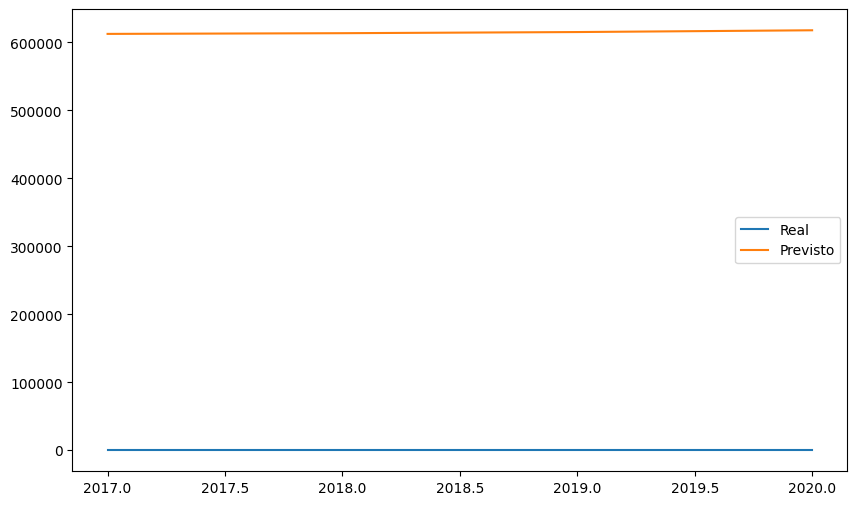

In [4]:
# Importações adicionais
from sklearn.metrics import mean_squared_error
from tensorflow.keras.callbacks import EarlyStopping

# Função para criar e treinar o modelo LSTM
def train_lstm_model(X_train, y_train, X_test, y_test, units, epochs, sequence_length):
    model = Sequential()
    model.add(LSTM(units, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.2))
    model.add(LSTM(units))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    
    model.compile(optimizer='adam', loss='mse')
    
    # Adicionando early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=16, 
                        validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=1)
    
    return model, history

# Experimentos com diferentes tamanhos de janelas, épocas e unidades
sequence_lengths = [3, 5, 7]  # Tamanhos das janelas
units_list = [32, 64, 128]    # Unidades LSTM
epochs_list = [30, 50, 70]    # Número de épocas

# Variáveis para armazenar os melhores resultados
best_model = None
best_loss = float('inf')
best_params = {}

# Loop para experimentar diferentes combinações de hiperparâmetros
for seq_len in sequence_lengths:
    X, y = create_sequences(df_scaled, seq_len)
    train_size = int(0.8 * len(X))
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]
    
    for units in units_list:
        for epochs in epochs_list:
            print(f"Treinando com seq_len={seq_len}, units={units}, epochs={epochs}...")
            model, history = train_lstm_model(X_train, y_train, X_test, y_test, units, epochs, seq_len)
            
            # Avaliação do modelo
            loss = model.evaluate(X_test, y_test)
            print(f"Loss: {loss}")
            
            # Se o modelo atual for melhor, atualize os melhores resultados
            if loss < best_loss:
                best_loss = loss
                best_model = model
                best_params = {'sequence_length': seq_len, 'units': units, 'epochs': epochs}

print(f"Melhores parâmetros encontrados: {best_params}")

# Fazer previsões com o melhor modelo
X, y = create_sequences(df_scaled, best_params['sequence_length'])
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

predictions = best_model.predict(X_test)
predictions_rescaled = scaler.inverse_transform(
    np.concatenate([np.zeros((predictions.shape[0], X_test.shape[2])), predictions], axis=1))[:, -1]

# Visualizar previsões e valores reais
plt.figure(figsize=(10, 6))
plt.plot(df_pais['Ano'][train_size+best_params['sequence_length']:], y_test, label='Real')
plt.plot(df_pais['Ano'][train_size+best_params['sequence_length']:], predictions_rescaled, label='Previsto')
plt.legend()
plt.show()
